# OpenClassRoom Projet 10 Data V2 : OMCFM : détection de faux billets

## 2 : Analyse du dataset

lien vers [notebook d'origine](Barrios_Mathieu_1_Code_022023.ipynb)

In [1]:
#importation des bibliotheques
import pandas as pd

#bibliotheque graphique
import matplotlib.pyplot as plt
import seaborn as sns

#import fichiers perso
import fonctions.perso_pandas as perso_pd


In [2]:
#donnée à changer au choix
sns.set_theme(style='dark')

#%matplotlib qt

In [3]:
#import des fichiers
data_billets = pd.read_csv("donnee_de_base/billets.csv",sep=";")
#difference entre les 2 fichiers : separateurs : virgules pour le fichier prod et ; pour la base
# la colonne "id" sert d'index
data_billets_test_exemple = pd.read_csv("donnee_de_base/billets_production.csv",index_col='id')


In [4]:
perso_pd.analyseDataFrame(data_billets)

################################# INFO  #################################
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    1500 non-null   bool   
 1   diagonal      1500 non-null   float64
 2   height_left   1500 non-null   float64
 3   height_right  1500 non-null   float64
 4   margin_low    1463 non-null   float64
 5   margin_up     1500 non-null   float64
 6   length        1500 non-null   float64
dtypes: bool(1), float64(6)
memory usage: 71.9 KB
################################# DESCRIBE  #################################


,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
count,1500,1500.000000,1500.000000,1500.000000,1463.000000,1500.000000,1500.00000
unique,2,NaN,NaN,NaN,NaN,NaN,NaN
top,True,NaN,NaN,NaN,NaN,NaN,NaN
freq,1000,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,171.958440,104.029533,103.920307,4.485967,3.151473,112.67850
std,NaN,0.305195,0.299462,0.325627,0.663813,0.231813,0.87273
min,NaN,171.040000,103.140000,102.820000,2.980000,2.270000,109.49000
25%,NaN,171.750000,103.820000,103.710000,4.015000,2.990000,112.03000
50%,NaN,171.960000,104.040000,103.920000,4.310000,3.140000,112.96000
75%,NaN,172.170000,104.230000,104.150000,4.870000,3.310000,113.34000


################################# HEAD  #################################


,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.46,103.36,103.66,3.77,2.99,113.09
2,True,172.69,104.48,103.50,4.40,2.94,113.16
3,True,171.36,103.91,103.94,3.62,3.01,113.51
4,True,171.73,104.28,103.46,4.04,3.48,112.54


################################# DOUBLONS  #################################


,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length


################################## recherche de clé pour merge ###################
pas de clé


Dans la section Infos : Margin_low il manque des données.<br>


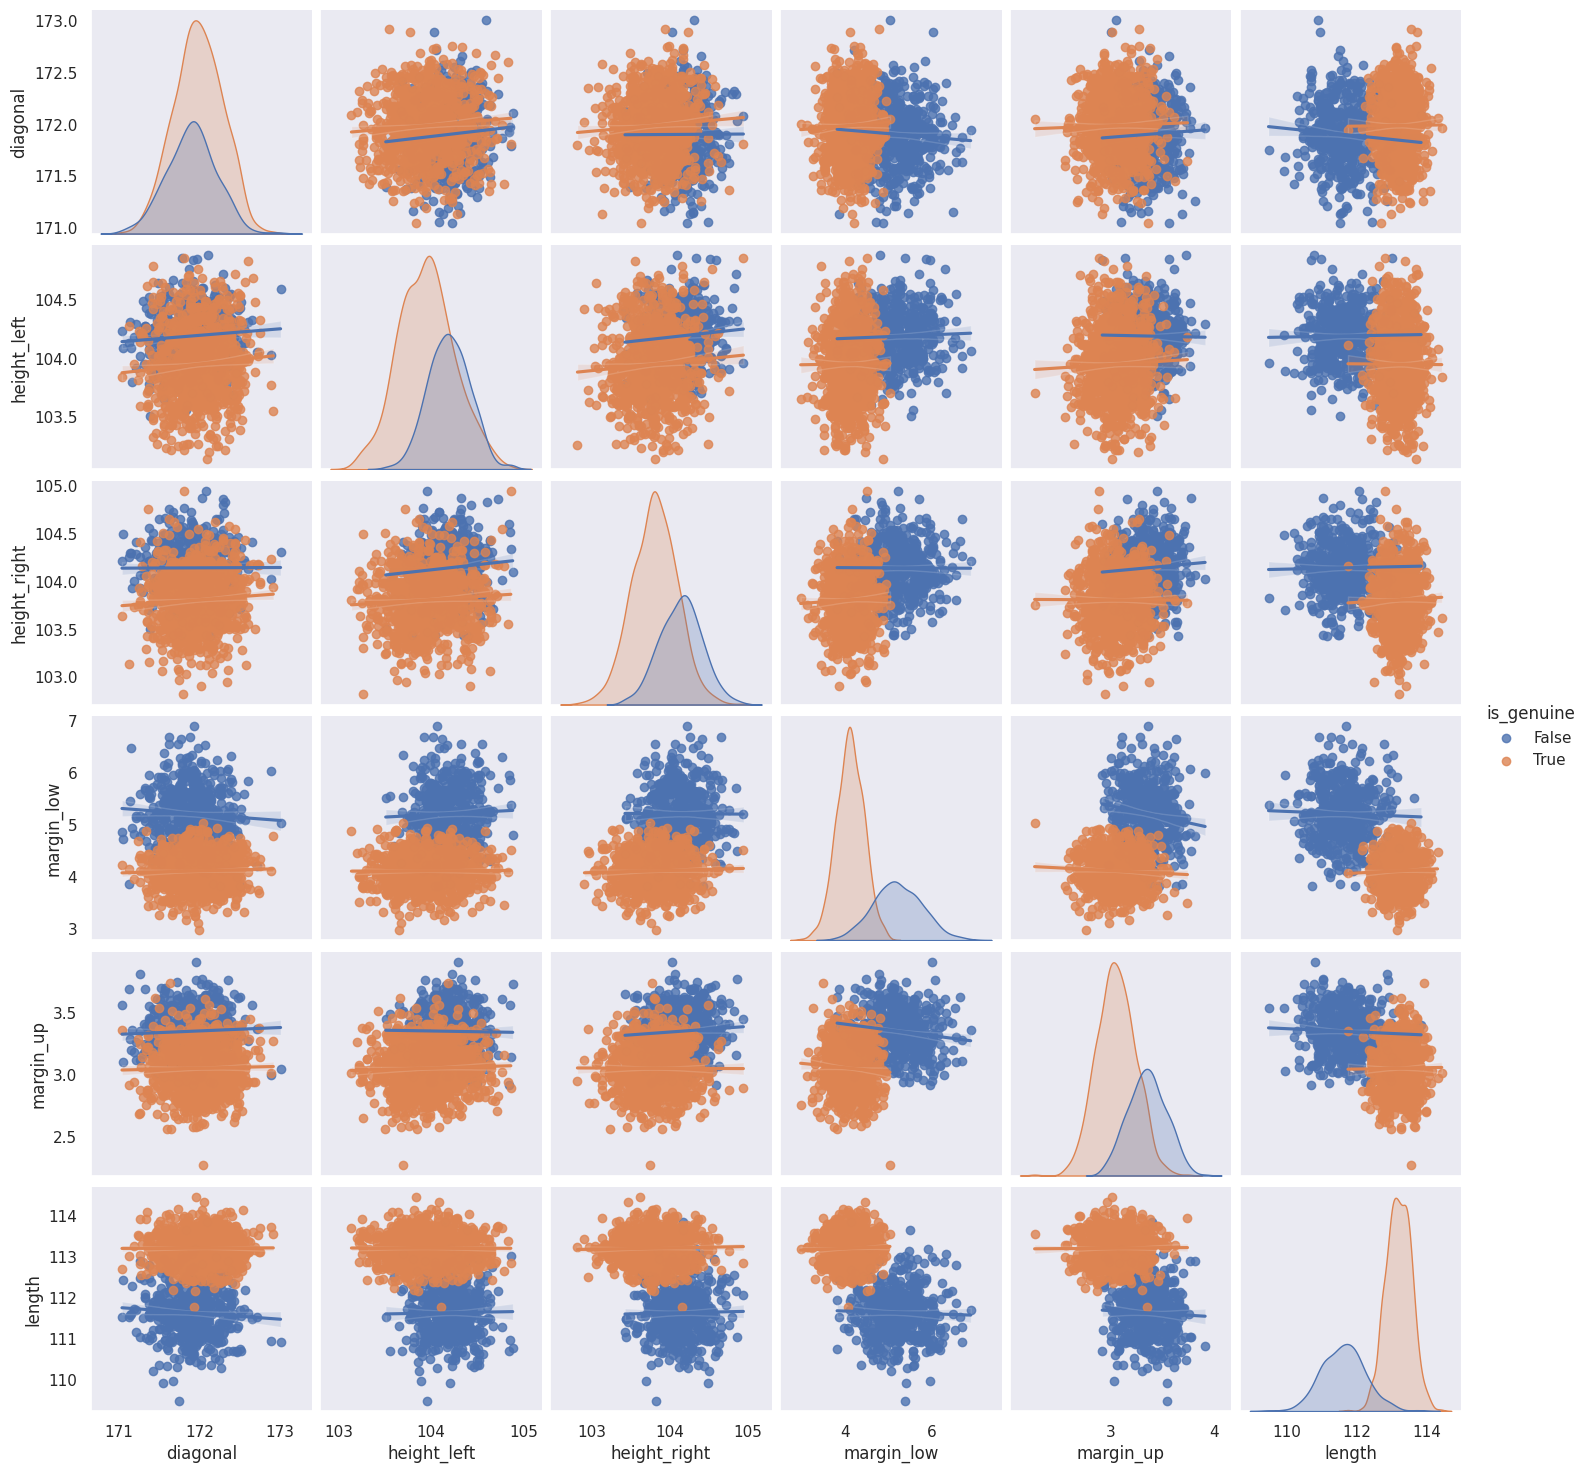

In [5]:
sns.pairplot(data=data_billets,hue='is_genuine',kind='reg')
plt.show()

On remarque:<br>
    Les distributions ont l'air normales en fonction des sources de billets (vrais faux)<br>
    Les colonnes margin_low et lenght permettent vraisemblablement de bien séparer les sources.<br>

Les distributions peuvent être dues au jeu mécanique des machines utilisées.<br>
On peut donc déterminer que les sources de billets peuvent vraisemblablement provenir d'une machine/usine unique.<br>

Pour margin_low, la régression linéaire simple ne me parait pas très fiable.<br>
<br>
https://fr.wikipedia.org/wiki/Jeu_(m%C3%A9canique)<br>
https://www.maxicours.com/se/cours/tolerance-d-ajustement-2/<br>

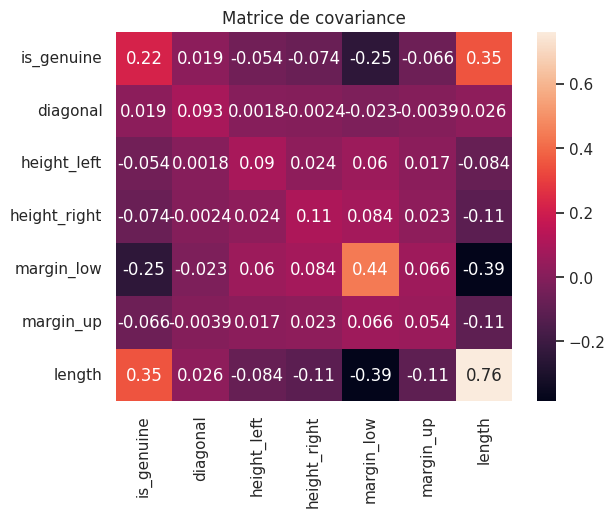

In [6]:
fig, ax = plt.subplots()
ax.set_title("Matrice de covariance")
ax = sns.heatmap(data_billets.cov(),annot=True)
plt.show()

Pour margin_low, la meilleure covariance est avec length (variance inverse).<br>
Les autres valeurs indiquent une faible covariance entre les colonnes.


In [7]:
data_billets['test diagonale'] = (data_billets['diagonal']
                                  -((data_billets['length']**2
                                    +((data_billets['height_right'])**2)
                                   )**0.5)
                                 )
display(data_billets[data_billets['test diagonale']!=0])

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length,test diagonale
0,True,171.81,104.86,104.95,4.52,2.89,112.83,17.715511
1,True,171.46,103.36,103.66,3.77,2.99,113.09,18.049623
2,True,172.69,104.48,103.50,4.40,2.94,113.16,19.336045
3,True,171.36,103.91,103.94,3.62,3.01,113.51,17.450794
4,True,171.73,104.28,103.46,4.04,3.48,112.54,18.860045
...,...,...,...,...,...,...,...,...
1495,False,171.75,104.38,104.17,4.42,3.09,111.28,19.320911
1496,False,172.19,104.63,104.44,5.27,3.37,110.97,19.802158
1497,False,171.80,104.01,104.12,5.51,3.36,111.95,18.915152
1498,False,172.06,104.28,104.06,5.17,3.46,112.25,18.996137


In [8]:
data_billets['marge_tot'] = data_billets['margin_low']+data_billets['margin_up']
data_billets['hauteur_tot'] = data_billets['marge_tot']+data_billets['height_left']
data_billets['test diagonale2'] = (data_billets['diagonal']
                                  -((data_billets['length']**2
                                    +((data_billets['hauteur_tot'])**2)
                                   )**0.5)
                                 )
display(data_billets[data_billets['test diagonale2']!=0])

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length,test diagonale,marge_tot,hauteur_tot,test diagonale2
0,True,171.81,104.86,104.95,4.52,2.89,112.83,17.715511,7.41,112.27,12.639771
1,True,171.46,103.36,103.66,3.77,2.99,113.09,18.049623,6.76,110.12,13.612724
2,True,172.69,104.48,103.50,4.40,2.94,113.16,19.336045,7.34,111.82,13.602295
3,True,171.36,103.91,103.94,3.62,3.01,113.51,17.450794,6.63,110.54,12.918807
4,True,171.73,104.28,103.46,4.04,3.48,112.54,18.860045,7.52,111.80,13.096802
...,...,...,...,...,...,...,...,...,...,...,...
1495,False,171.75,104.38,104.17,4.42,3.09,111.28,19.320911,7.51,111.89,13.944390
1496,False,172.19,104.63,104.44,5.27,3.37,110.97,19.802158,8.64,113.27,13.620035
1497,False,171.80,104.01,104.12,5.51,3.36,111.95,18.915152,8.87,112.88,12.819822
1498,False,172.06,104.28,104.06,5.17,3.46,112.25,18.996137,8.63,112.91,12.847153


gros écart entre la diagonale calculée et la diagonale réelle.<br>
J´en conclus que les billets ne sont pas rectangulaires.

In [9]:
#enlever les colonnes créées pour les tests diagonales
data_billets = data_billets.drop(columns=['test diagonale2','test diagonale','marge_tot','hauteur_tot'])

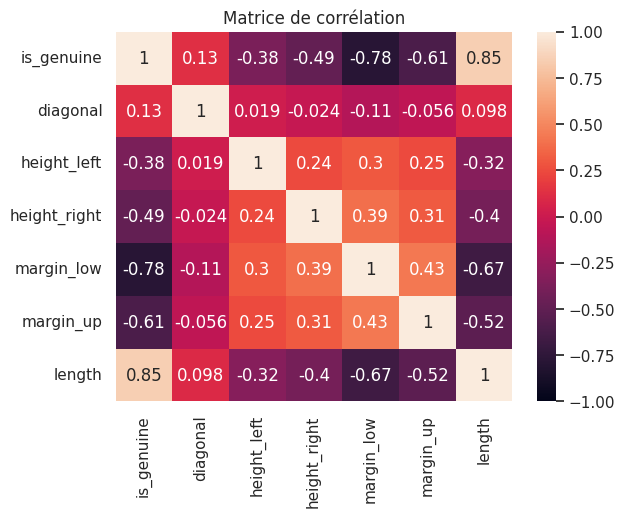

In [10]:
fig, ax = plt.subplots()
ax = sns.heatmap(data_billets.corr(),annot=True,vmin=-1,vmax=1)
ax.set_title("Matrice de corrélation")
plt.show()

On remarque une bonne corrélation entre margin_low et lenght par rapport aux autres colonnes.<br>

In [11]:
data_billets['espace_margin'] = data_billets['margin_low']-data_billets['margin_up']
data_billets[data_billets['espace_margin']<0]

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length,espace_margin
10,True,171.83,104.14,103.62,3.16,3.18,113.22,-0.02
52,True,171.64,104.18,103.78,3.49,3.74,113.94,-0.25
125,True,171.50,104.03,103.97,3.26,3.54,113.24,-0.28


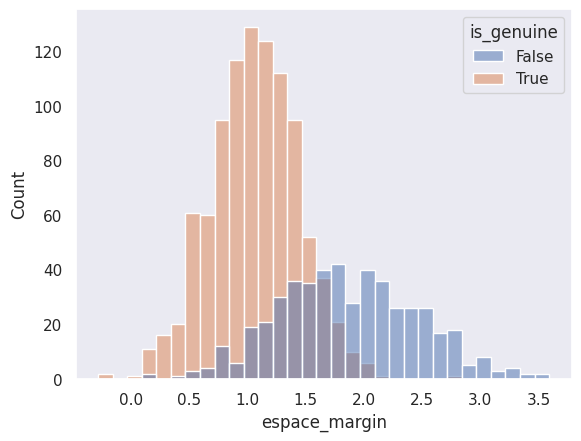

In [12]:
 fig,ax = plt.subplots()
sns.histplot(data=data_billets,x='espace_margin',hue='is_genuine',ax=ax)
plt.show()

Entre les diagonales bizarres et les impressions negatives, soit les mesures sont fausses, soit il ne s'agit pas de vraies données. 

### Conclusion :
Nan dans margin_low: on peut peut-être faire une régression lineaire entre lenght et margin_low.(à tester donc)<br>
Pour la séparation des vrais faux billets, les colonnes margin_low et length ont l'air de bien séparer les individus<br>

In [13]:
perso_pd.analyseDataFrame(data_billets_test_exemple)

################################# INFO  #################################
<class 'pandas.core.frame.DataFrame'>
Index: 5 entries, A_1 to A_5
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   diagonal      5 non-null      float64
 1   height_left   5 non-null      float64
 2   height_right  5 non-null      float64
 3   margin_low    5 non-null      float64
 4   margin_up     5 non-null      float64
 5   length        5 non-null      float64
dtypes: float64(6)
memory usage: 280.0+ bytes
################################# DESCRIBE  #################################


,diagonal,height_left,height_right,margin_low,margin_up,length
count,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
mean,171.954000,104.188000,103.972000,4.882000,3.238000,112.322000
std,0.326542,0.396257,0.393027,0.836821,0.142724,0.897201
min,171.650000,103.630000,103.540000,3.770000,3.030000,111.420000
25%,171.760000,104.010000,103.560000,4.440000,3.160000,111.570000
50%,171.870000,104.170000,104.130000,4.990000,3.300000,112.090000
75%,172.000000,104.550000,104.290000,5.210000,3.310000,113.200000
max,172.490000,104.580000,104.340000,6.000000,3.390000,113.330000


################################# HEAD  #################################


,diagonal,height_left,height_right,margin_low,margin_up,length
id,,,,,,
A_1,171.76,104.01,103.54,5.21,3.30,111.42
A_2,171.87,104.17,104.13,6.00,3.31,112.09
A_3,172.00,104.58,104.29,4.99,3.39,111.57
A_4,172.49,104.55,104.34,4.44,3.03,113.20
A_5,171.65,103.63,103.56,3.77,3.16,113.33


################################# DOUBLONS  #################################


,diagonal,height_left,height_right,margin_low,margin_up,length
id,,,,,,


################################## recherche de clé pour merge ###################
la colonne diagonal est une clé
la colonne height_left est une clé
la colonne height_right est une clé
la colonne margin_low est une clé
la colonne margin_up est une clé
la colonne length est une clé


In [14]:
help(perso_pd)

Help on module fonctions.perso_pandas in fonctions:

NAME
    fonctions.perso_pandas

FUNCTIONS
    analyseDataFrame(df)
        affiche un resumé des Dataframes info describe head et verification doublons
        
        Args:
            df : dataframe à analyser as dataFrame
        
        Returns:
            None
    
    categoriser(data, nom_col_recherche, mot_cle, nom_categorie, nom_col_categorie='categorie', regex=False)
        recherche un mot dans une string et enregistre un nom de categorie dans la colonne categorie (par defaut)
        Args:
            data : dataframe à catégoriser as DataFrame
            nom_col_recherche : colonne où rechercher as string
            nom_categorie : nom de la catégorie as string default : 'categorie
            nom_col_categorie : nom de la colonne cat"egorie a créer as string
            regex : utilisation de regex as bool default: False
        Returns :
            None
    
    detection_clé(df)
        indique si une colonne 